In [1]:
import glob
import os
from src.data_processing import check_csv_columns, preprocess_data, encode_time_features, drop_columns_inplace
from src.eda import (
    plot_monthly_pollution_levels,
    plot_correlation_heatmap,
    plot_scatter_relationships,
    plot_average_pollution_by_station
)
from src.data_processing import shift_AQI

from src.eda import (
    plot_histograms,
    plot_boxplots,
    apply_log_transformation,
    plot_transformed_boxplots
)

from src.feature_engineering import calculate_vif, plot_random_forest_feature_importance
from src.model_evaluation import fit_ols_regression
from src.data_processing import calculate_aqi_columns

from src.eda import feature_importance_mutual_info

from src.eda import (
    plot_average_aqi_by_season,
    plot_average_aqi_by_time_of_day,
    plot_heatmap_aqi_season_time_of_day,
    plot_density_aqi_by_season,
    plot_density_aqi_by_time_of_day
)

from src.model_training import train_and_evaluate_linear_regression ,train_random_forest, train_gradient_boosting, perform_grid_search, train_models_for_horizons

from src.model_evaluation import eval_final_model
from src.data_processing import generate_alert
import yaml

In [2]:
with open("config/config.yaml", "r") as file:
    config = yaml.safe_load(file)



# Data preprocessing 

## Loading dataset

In [3]:
# Define dataset directory
dataset_directory = config['paths']['dataset']

# Validate column consistency
csv_files_path = glob.glob(os.path.join(dataset_directory, '*.csv'))

print(csv_files_path)
check_csv_columns(csv_files_path)

# Load the dataset
air_quality_df = preprocess_data(dataset_directory)

air_quality_df.head()

['airquality_dataset/PRSA_Data_Gucheng_20130301-20170228.csv', 'airquality_dataset/PRSA_Data_Huairou_20130301-20170228.csv', 'airquality_dataset/PRSA_Data_Tiantan_20130301-20170228.csv', 'airquality_dataset/PRSA_Data_Changping_20130301-20170228.csv', 'airquality_dataset/PRSA_Data_Guanyuan_20130301-20170228.csv', 'airquality_dataset/PRSA_Data_Nongzhanguan_20130301-20170228.csv', 'airquality_dataset/PRSA_Data_Wanliu_20130301-20170228.csv', 'airquality_dataset/PRSA_Data_Dongsi_20130301-20170228.csv', 'airquality_dataset/PRSA_Data_Wanshouxigong_20130301-20170228.csv', 'airquality_dataset/PRSA_Data_Aotizhongxin_20130301-20170228.csv', 'airquality_dataset/PRSA_Data_Dingling_20130301-20170228.csv', 'airquality_dataset/PRSA_Data_Shunyi_20130301-20170228.csv']
All files have the same columns.


Combined DataFrame shape after handling nulls and cleaning data: (381128, 18)


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
20,21,2013,3,1,20,13.0,25.0,12.0,5.0,1100.0,61.0,1.6,1027.1,-18.4,0.0,ESE,1.9,Gucheng
21,22,2013,3,1,21,15.0,23.0,14.0,13.0,1200.0,52.0,1.0,1028.1,-17.4,0.0,SSE,0.7,Gucheng
22,23,2013,3,1,22,16.0,28.0,16.0,19.0,1200.0,45.0,1.3,1028.4,-17.6,0.0,E,1.0,Gucheng
23,24,2013,3,1,23,16.0,28.0,14.0,20.0,1100.0,44.0,0.2,1028.6,-17.6,0.0,ESE,1.1,Gucheng
24,25,2013,3,2,0,14.0,18.0,24.0,43.0,1399.0,25.0,-0.3,1028.9,-18.0,0.0,ENE,1.4,Gucheng


## HANDLING UNWANTED COLUMNS

In [4]:
air_quality_df = encode_time_features(air_quality_df)

drop_columns_inplace(air_quality_df, ['No', 'year'])

air_quality_df.head()

,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,season,time_of_day
20,3,1,20,13.0,25.0,12.0,5.0,1100.0,61.0,1.6,1027.1,-18.4,0.0,ESE,1.9,Gucheng,Spring,Evening
21,3,1,21,15.0,23.0,14.0,13.0,1200.0,52.0,1.0,1028.1,-17.4,0.0,SSE,0.7,Gucheng,Spring,Evening
22,3,1,22,16.0,28.0,16.0,19.0,1200.0,45.0,1.3,1028.4,-17.6,0.0,E,1.0,Gucheng,Spring,Evening
23,3,1,23,16.0,28.0,14.0,20.0,1100.0,44.0,0.2,1028.6,-17.6,0.0,ESE,1.1,Gucheng,Spring,Evening
24,3,2,0,14.0,18.0,24.0,43.0,1399.0,25.0,-0.3,1028.9,-18.0,0.0,ENE,1.4,Gucheng,Spring,Night


# EXPLORATORY DATA ANALYSIS

Plotting Monthly Pollution Levels...


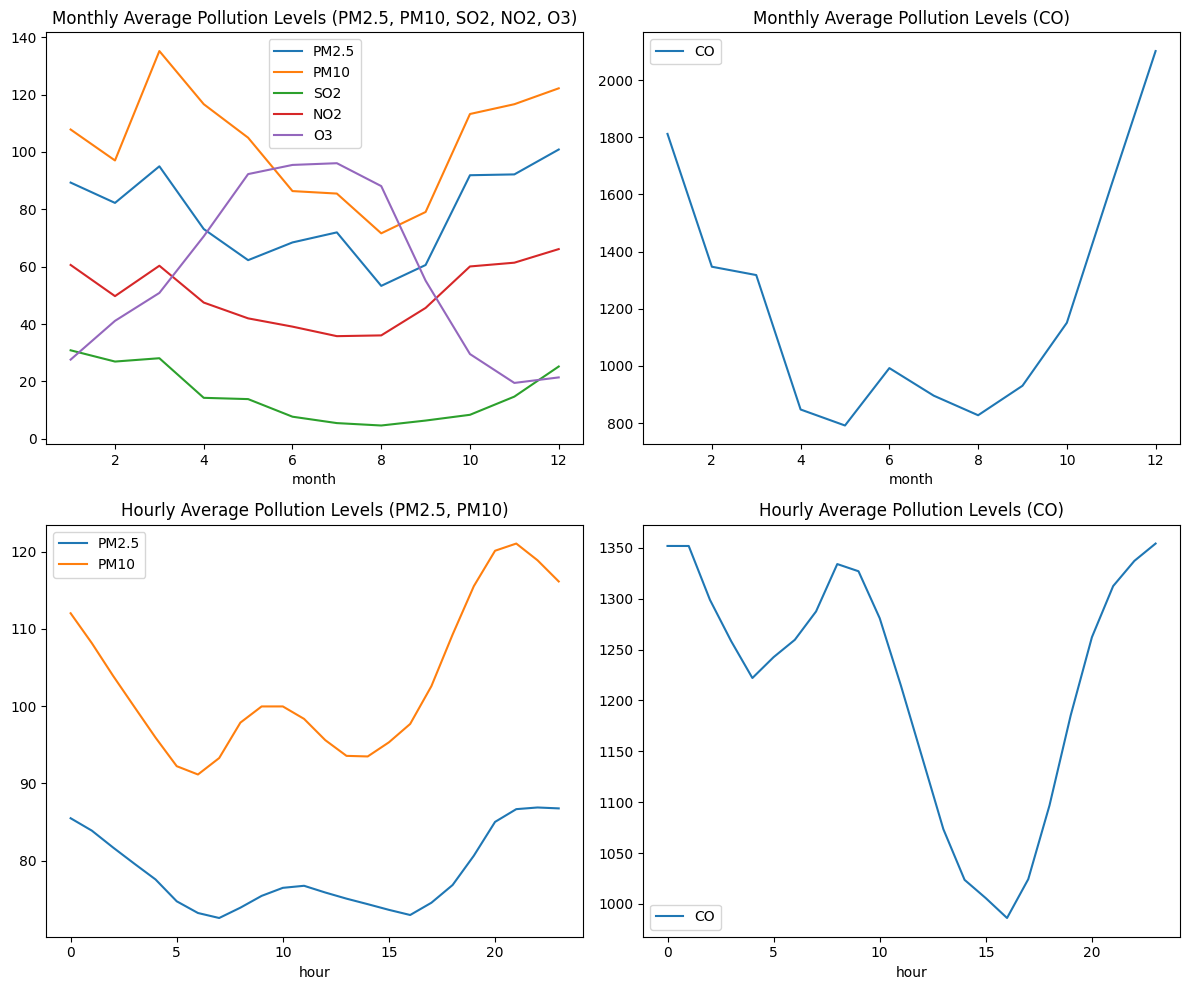

In [5]:
# Perform EDA
print("Plotting Monthly Pollution Levels...")
plot_monthly_pollution_levels(air_quality_df)



Plotting Correlation Heatmap...


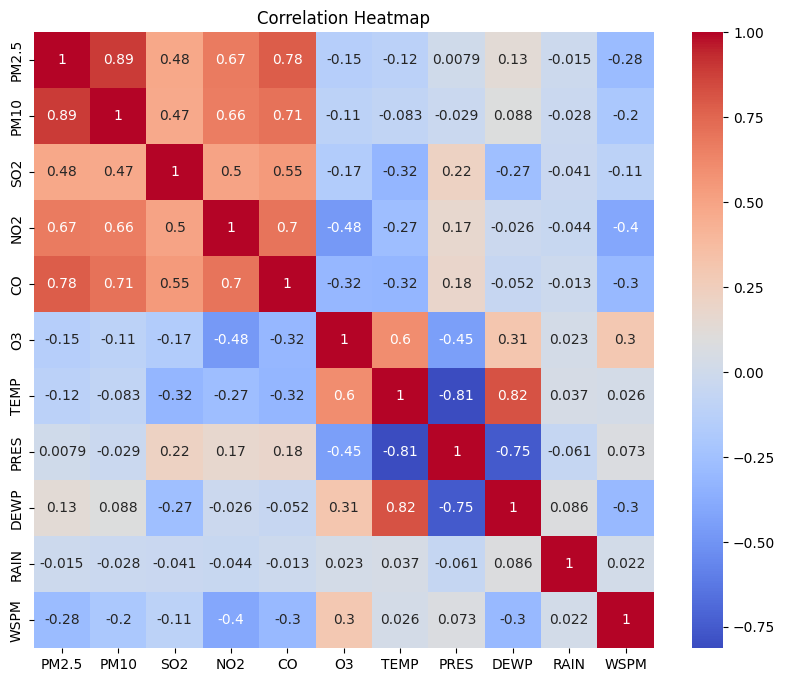

In [6]:
#Correlation analysis
# 1. Pollutant Correlations: Determine correlations between different pollutants (PM2.5, PM10, SO2, etc.) to see if certain pollutants tend to rise or fall together.
# 2. Environmental Factor Correlations: Check correlations between pollutants and environmental factors (TEMP, PRES, DEWP, RAIN, WSPM).

print("Plotting Correlation Heatmap...")
plot_correlation_heatmap(air_quality_df)

Findings from the heatmap:

- PM2.5 and PM10 have a very strong positive correlation (0.88). This indicates that when PM2.5 levels are high, PM10 levels are likely to be high as well
- CO has strong correlations with PM2.5 (0.79), PM10 (0.7), and NO2 (0.71). - carbon monoxide often co-occurs with particulate matter and nitrogen dioxide- vehicle emissions or industrial pollution.
- Wind Speed (WSPM) shows negative correlations with PM2.5 (-0.27), PM10 (-0.18), and NO2 (-0.4) - higher wind speeds may help reduce pollutant concentrations, likely by dispersing pollutants.
- Rain has very weak correlations with pollutants, suggesting that rain might not significantly impact the pollution levels in this dataset - rain often does help clear the air of particulate matter ( maybe in this dataset)
- Temperature (TEMP) has a moderate positive correlation with O3 (0.59), indicating that higher temperatures might increase ozone levels
- Temperature is negatively correlated with PRES (pressure) (-0.81) and DEWP (dew point) (-0.82), showing that high temperatures are associated with lower pressure and dew point in this dataset

Plotting Scatter Relationships...


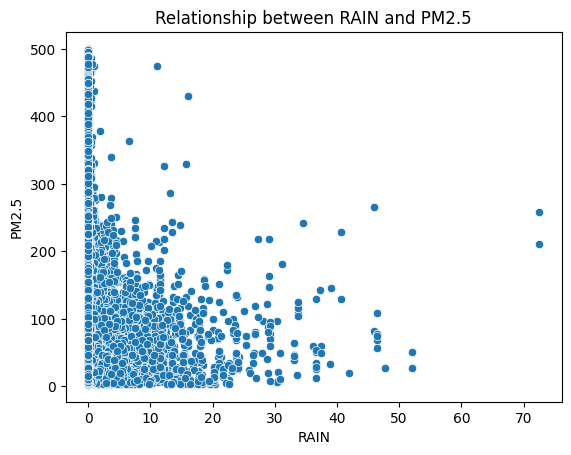

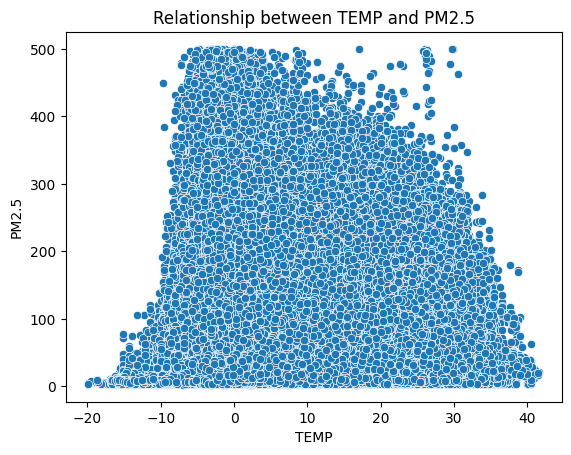

In [7]:
print("Plotting Scatter Relationships...")
plot_scatter_relationships(air_quality_df,'RAIN', 'PM2.5')
plot_scatter_relationships(air_quality_df,'TEMP', 'PM2.5')


Findings from scatterplot
- General downward trend in PM2.5 levels as Rain values increase
- The highest concentrations of PM2.5 are observed when rainfall is near zero or very low. This indicates that in dry conditions, PM2.5 levels are more likely to accumulate in the air.
- As rainfall increases (above 10 mm), PM2.5 levels tend to remain relatively low, indicating that rain effectively mitigates air pollution by capturing particulates and clearing the air.

Plotting Average Pollution Levels by Station...


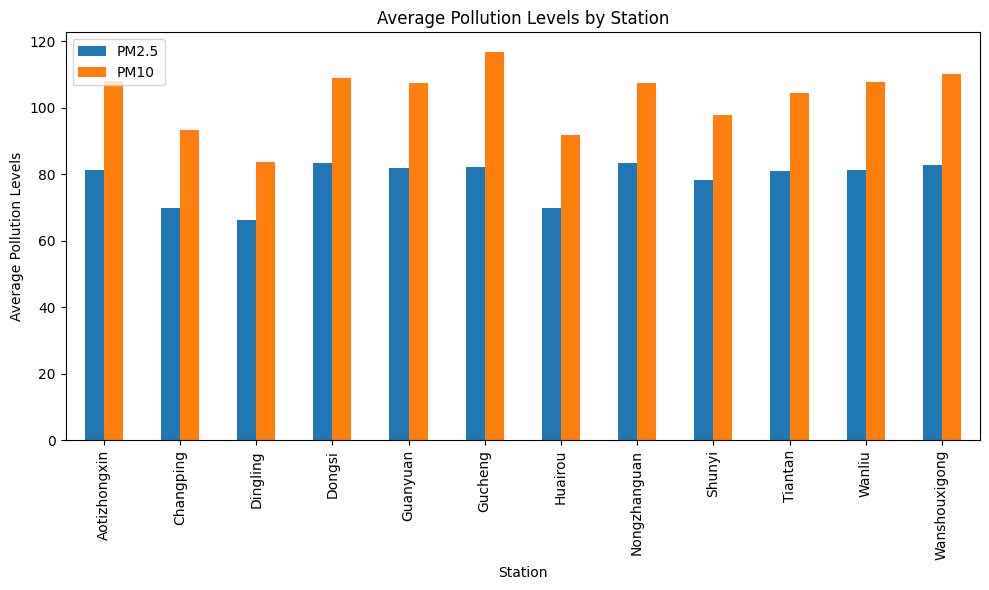

In [8]:

print("Plotting Average Pollution Levels by Station...")
plot_average_pollution_by_station(air_quality_df)

# OUTLIER DETECTION AND HANDLING

Plotting Histograms...


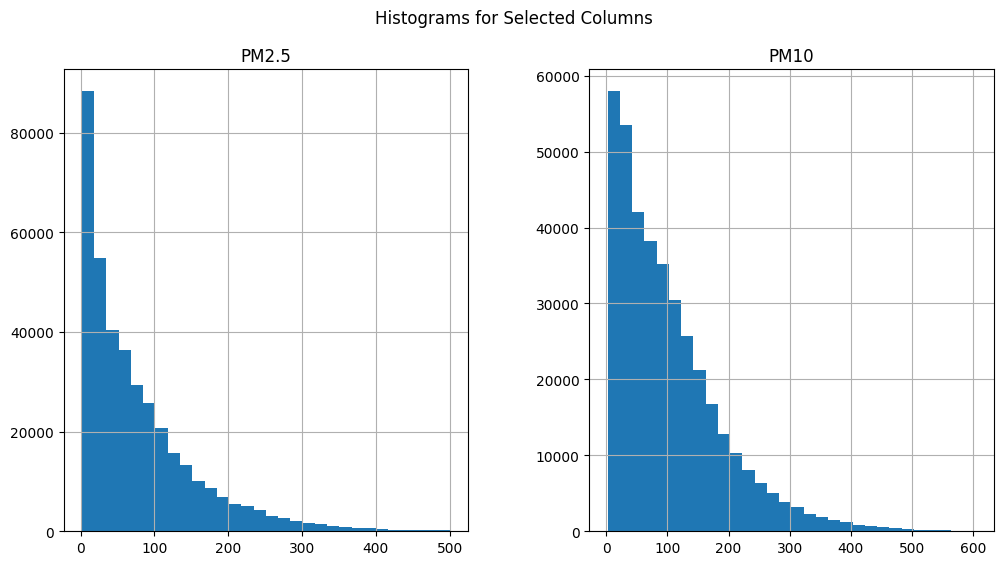

In [9]:
# Original columns to visualize
columns = ['PM2.5', 'PM10']

# Plot histograms for PM2.5 and PM10
print("Plotting Histograms...")
plot_histograms(air_quality_df, columns)



Plotting Boxplots...


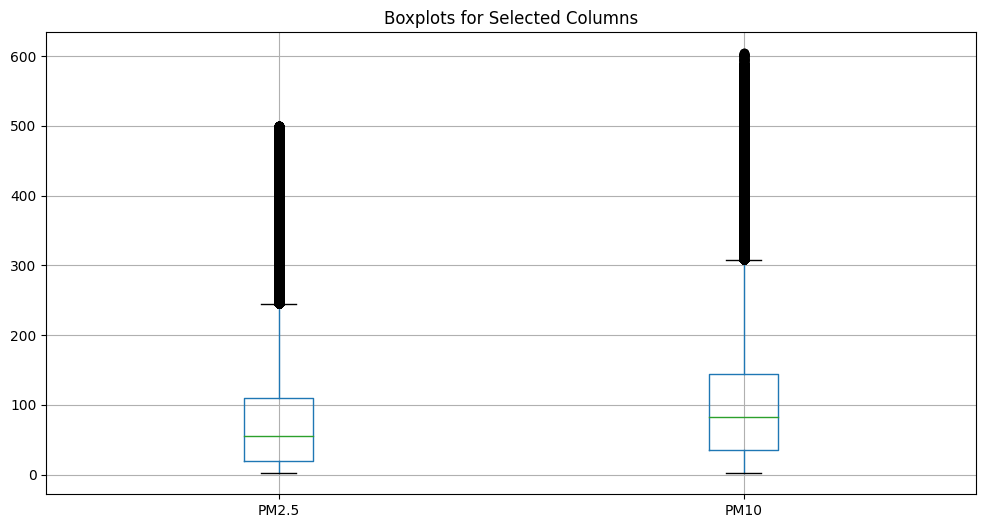

In [10]:
# Plot boxplots for PM2.5 and PM10
print("Plotting Boxplots...")
plot_boxplots(air_quality_df, columns)

Findings from histogram and boxplot:
- Right skewed distrubition
- Given the clustering of values at the low end, it’s likely that air quality is generally acceptable or within safe levels for a significant portion of the time, but the right-skewed tail suggests occasional exceedances of recommended pollutant limits.
- There are a few cases where PM2.5 and PM10 levels are much higher, as indicated by the long tails in each histogram. These are likely outlier events or high pollution days, which may be due to specific environmental conditions or pollution sources (e.g., industrial emissions, traffic congestion, or weather patterns).

In [11]:
# Apply log transformation and update DataFrame
print("Applying Log Transformation...")
air_quality_df = apply_log_transformation(air_quality_df, columns)

Applying Log Transformation...


Log transformation is particularly useful for skewed data with high outliers, as it:
- Compresses large values and reduces the impact of outliers.
- Helps in making the data distribution more symmetrical, which can be beneficial for many statistical and machine learning models.

Plotting Boxplots for Log-Transformed Data...


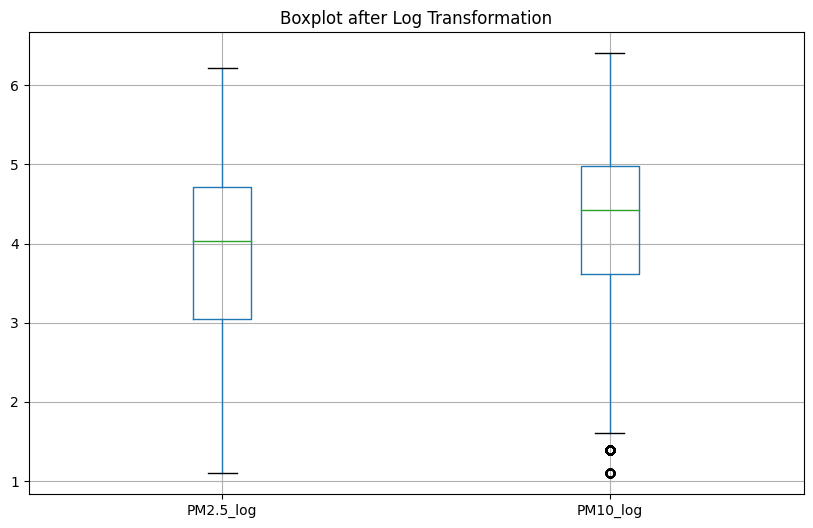

In [12]:
# Plot boxplots for log-transformed columns
transformed_columns = ['PM2.5_log', 'PM10_log']
print("Plotting Boxplots for Log-Transformed Data...")
plot_transformed_boxplots(air_quality_df, transformed_columns)

# Feature Importance

VIF Data:
  feature        VIF
0    TEMP  15.799782
1    PRES  13.388913
2    DEWP   5.462833
3    RAIN   1.029124
4    WSPM   4.766198
5      CO   4.929677
6     NO2   7.680553
7      O3   4.372810
Plotting Random Forest Feature Importance...


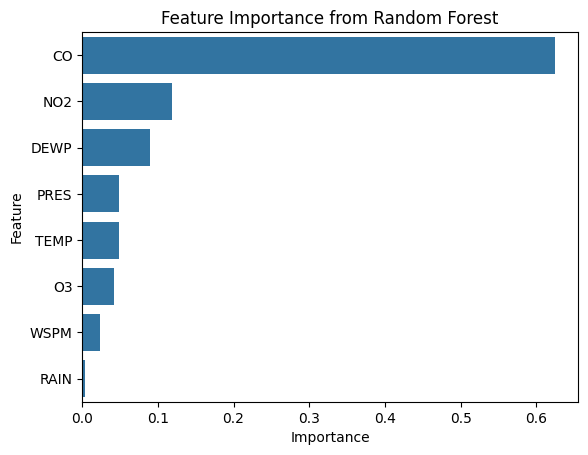

Fitting OLS Regression...
                            OLS Regression Results                            
Dep. Variable:                  PM2.5   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                 1.099e+05
Date:                Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                        11:17:50   Log-Likelihood:            -1.9687e+06
No. Observations:              381128   AIC:                         3.937e+06
Df Residuals:                  381119   BIC:                         3.937e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        367.6422     

In [13]:

feature_importance = config['features_importance']['selected']
feature_importance_target = config['features_importance']['target']

# Feature Importance Analysis
X = air_quality_df[feature_importance]
y = air_quality_df[feature_importance_target]

# Calculate VIF
vif_data = calculate_vif(X)
print("VIF Data:")
print(vif_data)

# Plot Random Forest Feature Importance
print("Plotting Random Forest Feature Importance...")
plot_random_forest_feature_importance(X, y)

# OLS Regression
X = air_quality_df[feature_importance]
y = air_quality_df[feature_importance_target]

print("Fitting OLS Regression...")
ols_summary = fit_ols_regression(X, y)
print(ols_summary)

Key Observation
- The R-squared value of 0.673 indicates that the model explains about 67.3% of the variance in PM2.5 levels, which is quite substantial
All predictors (TEMP, PRES, DEWP, CO, and NO2) are statistically significant as their P-values are less than 0.05.
- Coefficients:
    - TEMP (0.0411): A positive coefficient indicates that higher temperatures are associated with a slight increase in PM2.5 levels.
    - PRES (-0.3604): A strong negative coefficient suggests that higher pressure is associated with lower PM2.5 levels, likely due to atmospheric dispersion.
    - DEWP (0.7103): A strong positive coefficient suggests that higher dew points (humidity) correlate with higher PM2.5 levels, potentially due to moisture trapping pollutants.
    - CO (0.0437): A positive coefficient indicates a relationship between CO levels and PM2.5, as combustion sources often emit both.
    - NO2 (0.5217): A significant positive coefficient highlights the impact of NO2, a common pollutant, on PM2.5 levels.
- The condition number 3.19e+05 is quite high, indicating potential multicollinearity issues. This aligns with high VIF values for TEMP and PRES.

# Model Building

## Calculating AQI

In [14]:
# Specify the path to the breakpoints.json file
breakpoints_file_path = config['paths']['breakpoints']

# Calculate AQI and add it to the DataFrame
air_quality_df = calculate_aqi_columns(air_quality_df, breakpoints_file_path)

# Display the resulting DataFrame
print(air_quality_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'AQI']].head())

    PM2.5  PM10   SO2   NO2      CO    O3        AQI
20   13.0  25.0  12.0   5.0  1100.0  61.0  52.892704
21   15.0  23.0  14.0  13.0  1200.0  52.0  57.098712
22   16.0  28.0  16.0  19.0  1200.0  45.0  59.201717
23   16.0  28.0  14.0  20.0  1100.0  44.0  59.201717
24   14.0  18.0  24.0  43.0  1399.0  25.0  54.995708


In [15]:
air_quality_df.head()

,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,...,time_of_day,PM2.5_log,PM10_log,PM2.5_AQI,PM10_AQI,SO2_AQI,NO2_AQI,CO_AQI,O3_AQI,AQI
20,3,1,20,13.0,25.0,12.0,5.0,1100.0,61.0,1.6,...,Evening,2.639057,3.258097,52.892704,23.148148,17.142857,4.716981,12.500000,24.4,52.892704
21,3,1,21,15.0,23.0,14.0,13.0,1200.0,52.0,1.0,...,Evening,2.772589,3.178054,57.098712,21.296296,20.000000,12.264151,13.636364,20.8,57.098712
22,3,1,22,16.0,28.0,16.0,19.0,1200.0,45.0,1.3,...,Evening,2.833213,3.367296,59.201717,25.925926,22.857143,17.924528,13.636364,18.0,59.201717
23,3,1,23,16.0,28.0,14.0,20.0,1100.0,44.0,0.2,...,Evening,2.833213,3.367296,59.201717,25.925926,20.000000,18.867925,12.500000,17.6,59.201717
24,3,2,0,14.0,18.0,24.0,43.0,1399.0,25.0,-0.3,...,Night,2.708050,2.944439,54.995708,16.666667,34.285714,40.566038,15.897727,10.0,54.995708


In [16]:
drop_columns_inplace(air_quality_df, ['PM2.5_AQI', 'PM10_AQI', 'SO2_AQI', 'NO2_AQI', 'CO_AQI','O3_AQI','month','day', 'hour'])

In [17]:
air_quality_df.isnull().sum()

PM2.5          0
PM10           0
SO2            0
NO2            0
CO             0
O3             0
TEMP           0
PRES           0
DEWP           0
RAIN           0
wd             0
WSPM           0
station        0
season         0
time_of_day    0
PM2.5_log      0
PM10_log       0
AQI            0
dtype: int64

## EDA with AQI

/Users/naveenam/Documents/GitHub/ENGM680_AQI_predictions/src/eda.py:113: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='season', y='AQI', data=df, ci=None, palette='Set2')
/Users/naveenam/Documents/GitHub/ENGM680_AQI_predictions/src/eda.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='AQI', data=df, ci=None, palette='Set2')


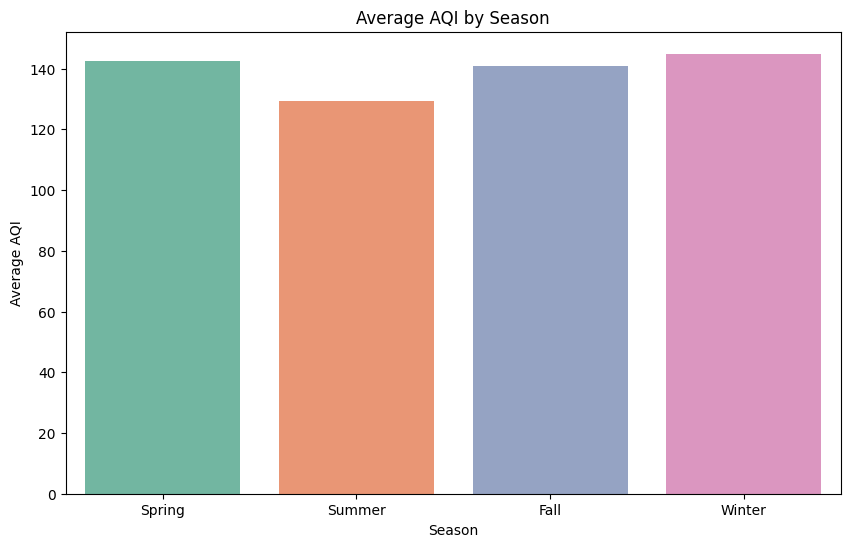

/Users/naveenam/Documents/GitHub/ENGM680_AQI_predictions/src/eda.py:124: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='time_of_day', y='AQI', data=df, ci=None, palette='Set3')
/Users/naveenam/Documents/GitHub/ENGM680_AQI_predictions/src/eda.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time_of_day', y='AQI', data=df, ci=None, palette='Set3')


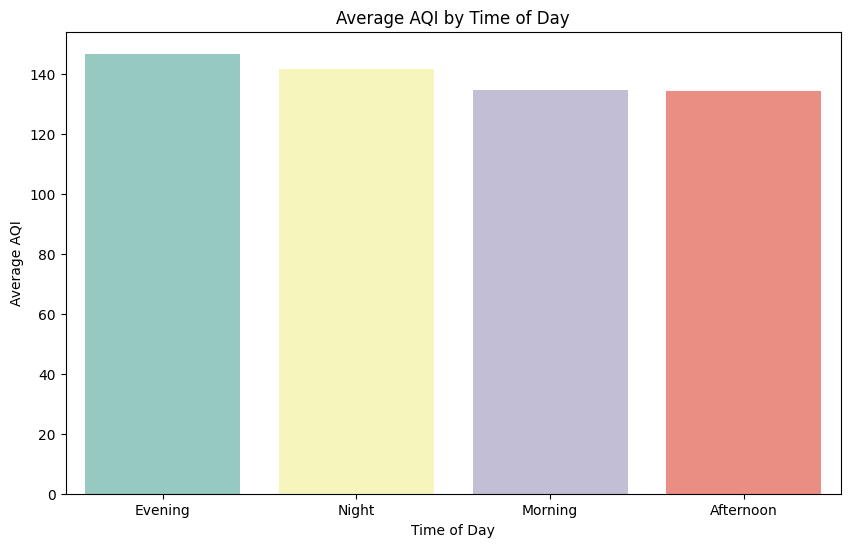

In [18]:
# Average AQI by season
plot_average_aqi_by_season(air_quality_df)

# Average AQI by time of day
plot_average_aqi_by_time_of_day(air_quality_df)


Average AQI by Season
- Observation: The AQI levels are fairly consistent across all seasons, with slight variations. Winter shows the highest average AQI, indicating a potential spike in pollution during this season, whereas summer appears to have the lowest.
- Insight: The trend suggests seasonal effects on air quality, possibly due to weather patterns, heating requirements in winter, or agricultural activities.

Average AQI by Time of Day:
- Observation: The evening shows a slightly higher average AQI compared to other times of the day, with the night, morning, and afternoon being relatively similar.
- Insight: This could be linked to human activities like increased vehicular emissions and industrial operations during the evening.

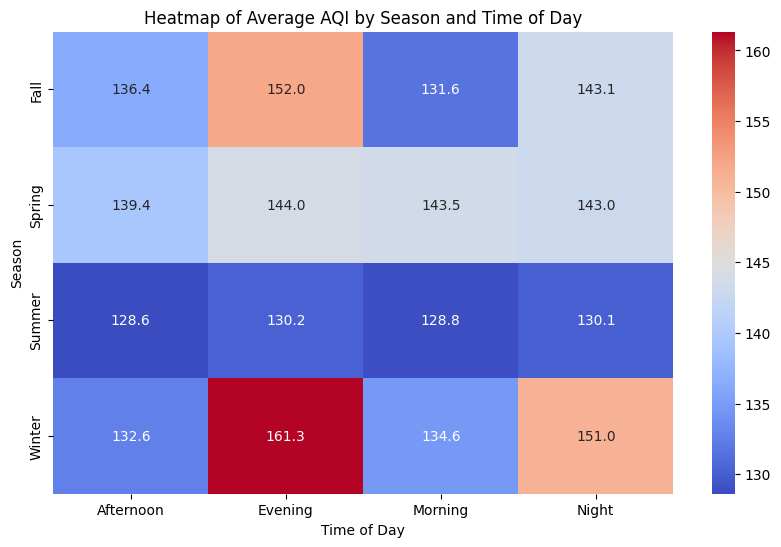

In [19]:
# Heatmap of AQI by season and time of day
plot_heatmap_aqi_season_time_of_day(air_quality_df)


Heatmap of Average AQI by Season and Time of Day:
- Observation: The evening in winter exhibits the highest AQI, while summer mornings show the lowest. The heatmap effectively highlights combined seasonal and diurnal patterns.
- Insight: The combination of seasonal and time-of-day factors provides a comprehensive view of when air quality deteriorates, allowing for targeted alerts.

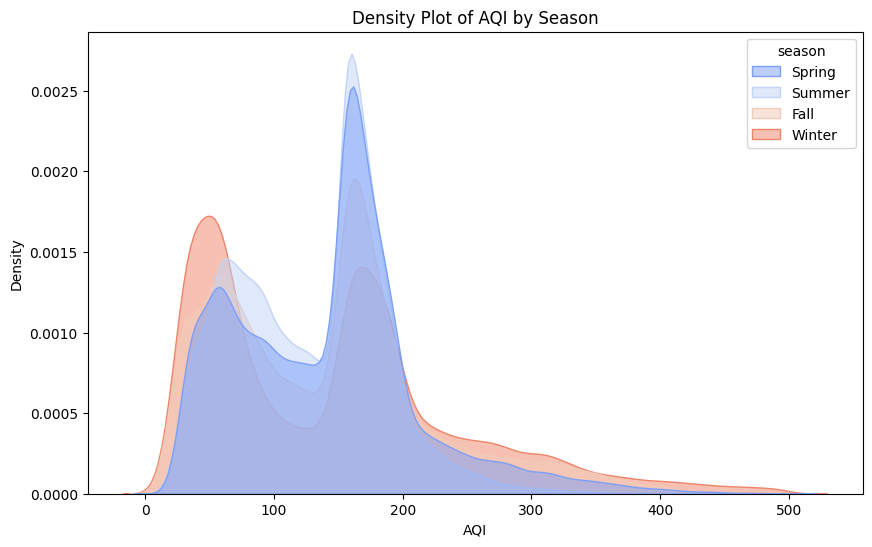

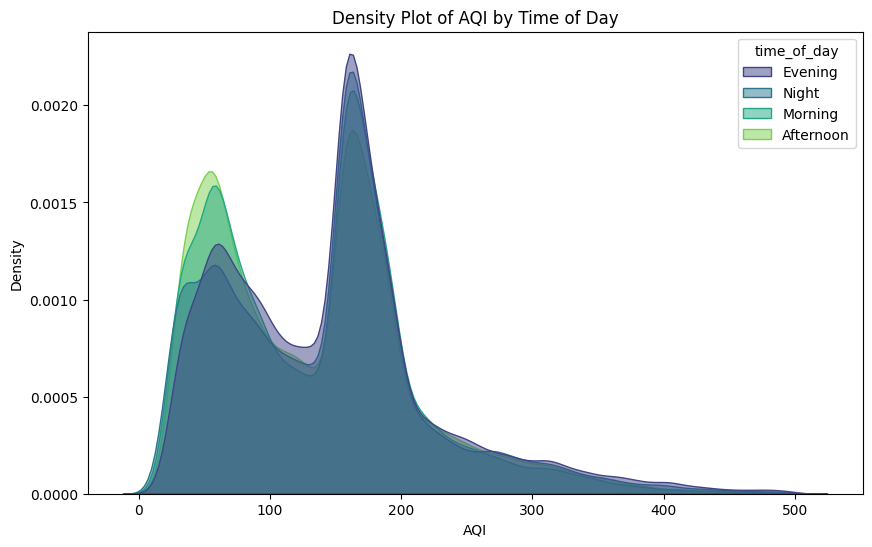

In [20]:
# Density plot of AQI by season
plot_density_aqi_by_season(air_quality_df)

# Density plot of AQI by time of day
plot_density_aqi_by_time_of_day(air_quality_df)

Density Plot of AQI by Season:
- Observation: There is a clear peak around lower AQI values for all seasons, but winter has a wider spread, indicating higher variability and potentially worse air quality compared to other seasons.
- Insight: This suggests that while good air quality is common, winter experiences more extreme pollution levels, possibly due to additional emissions from heating.

Density Plot of AQI by Time of Day:
- Observation: The AQI distribution shows similar peaks for all times of day, with evening having a slightly broader spread towards higher AQI values.
- Insight: Evening time may require closer monitoring for air quality as it tends to show higher levels of pollution compared to other times.

Feature Importance based on Mutual Information:
   Feature  Mutual Information
0    PM2.5            4.998288
1     PM10            1.784777
4       CO            0.634661
3      NO2            0.488983
5       O3            0.433820
2      SO2            0.192608
8     DEWP            0.157159
10    WSPM            0.084084
6     TEMP            0.068835
7     PRES            0.066384
9     RAIN            0.007036


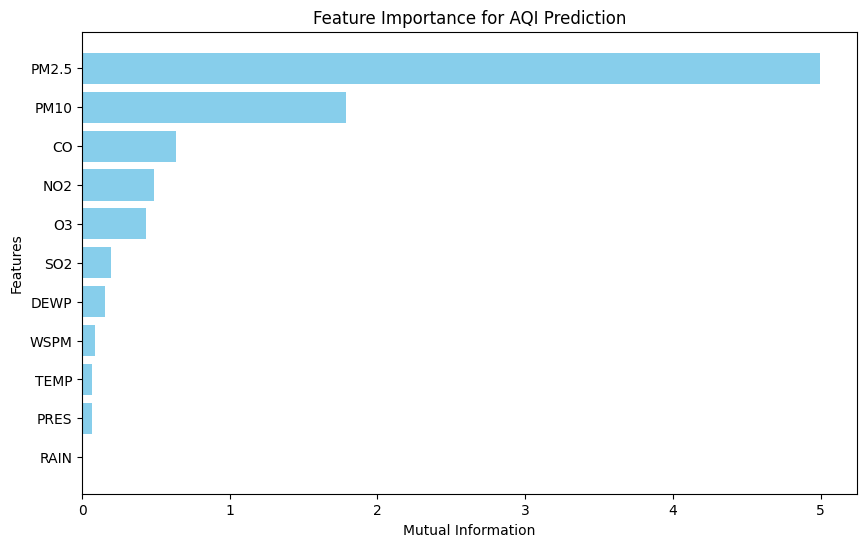

In [21]:
selected_features = config['features']['selected']
target = config['features']['target']

# Calculate and plot mutual information feature importance
mi_scores_df = feature_importance_mutual_info(air_quality_df, selected_features, target)

## Linear Regression

In [22]:
# Define selected features and target variable
selected_features = config['features']['selected']
target = config['features']['target']
X = air_quality_df[selected_features]
y = air_quality_df[target]
test_size=config['training']['test_size']
random_state=config['training']['random_state']

In [23]:
X

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
20,13.0,25.0,12.0,5.0,1100.0,61.0,1.6,1027.1,-18.4,0.0,1.9
21,15.0,23.0,14.0,13.0,1200.0,52.0,1.0,1028.1,-17.4,0.0,0.7
22,16.0,28.0,16.0,19.0,1200.0,45.0,1.3,1028.4,-17.6,0.0,1.0
23,16.0,28.0,14.0,20.0,1100.0,44.0,0.2,1028.6,-17.6,0.0,1.1
24,14.0,18.0,24.0,43.0,1399.0,25.0,-0.3,1028.9,-18.0,0.0,1.4
...,...,...,...,...,...,...,...,...,...,...,...
420763,27.0,72.0,8.0,92.0,800.0,16.0,10.3,1014.2,-12.4,0.0,1.8
420764,47.0,55.0,17.0,86.0,1100.0,19.0,9.8,1014.5,-9.9,0.0,1.5
420765,18.0,28.0,4.0,30.0,500.0,64.0,9.1,1014.6,-12.7,0.0,1.7
420766,18.0,20.0,9.0,33.0,500.0,59.0,7.1,1015.2,-13.2,0.0,1.8


In [24]:
y

20         52.892704
21         57.098712
22         59.201717
23         59.201717
24         54.995708
             ...    
420763     91.478261
420764    129.316583
420765     63.407725
420766     63.407725
420767     57.098712
Name: AQI, Length: 381128, dtype: float64

In [25]:
# Train and evaluate Linear Regression model
metrics, lr_model = train_and_evaluate_linear_regression(X,y, test_size, random_state)

# Display metrics
print(metrics)

Mean Absolute Error (MAE): 15.428138236807348
Root Mean Squared Error (RMSE): 19.786003915996673
{'MAE': 15.428138236807348, 'RMSE': 19.786003915996673}


# Gradient Boosting

In [26]:
gb_metrics, gb_model = train_gradient_boosting(X, y, test_size, random_state)
print("Gradient Boosting Metrics:", gb_metrics)

Gradient Boosting Metrics: {'R2 Score': 0.9982588093015483, 'RMSE': 3.3177833004396025}


# Random Forest Regressor

In [27]:
rf_metrics, rf_model = train_random_forest(X, y, test_size, random_state)
print("Random Forest Metrics:", rf_metrics)

Random Forest Metrics: {'MAE': 0.05923238153958436, 'RMSE': 1.2699615786341605}


## Fine tuning

In [28]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
best_params, best_score, grid_search = perform_grid_search(X, y, param_grid, test_size, random_state)
print("Best Parameters:", best_params)
print("Best Grid Search Score:", best_score)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best Grid Search Score: 0.9996888352841776


## Use the best params from gridsearch

In [29]:
print(X.head(5))

metrics, final_model = eval_final_model(X, y, best_params)

print("Final Model Performance:")
for metric, value in metrics.items():
    print(f"{metric}: {value}")

    PM2.5  PM10   SO2   NO2      CO    O3  TEMP    PRES  DEWP  RAIN  WSPM
20   13.0  25.0  12.0   5.0  1100.0  61.0   1.6  1027.1 -18.4   0.0   1.9
21   15.0  23.0  14.0  13.0  1200.0  52.0   1.0  1028.1 -17.4   0.0   0.7
22   16.0  28.0  16.0  19.0  1200.0  45.0   1.3  1028.4 -17.6   0.0   1.0
23   16.0  28.0  14.0  20.0  1100.0  44.0   0.2  1028.6 -17.6   0.0   1.1
24   14.0  18.0  24.0  43.0  1399.0  25.0  -0.3  1028.9 -18.0   0.0   1.4
Final Model Performance:
Mean Absolute Error (MAE): 0.06783274699387933
Root Mean Squared Error (RMSE): 1.6294929073365152
R² Score: 0.9995799942329738


In [30]:
X

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
20,13.0,25.0,12.0,5.0,1100.0,61.0,1.6,1027.1,-18.4,0.0,1.9
21,15.0,23.0,14.0,13.0,1200.0,52.0,1.0,1028.1,-17.4,0.0,0.7
22,16.0,28.0,16.0,19.0,1200.0,45.0,1.3,1028.4,-17.6,0.0,1.0
23,16.0,28.0,14.0,20.0,1100.0,44.0,0.2,1028.6,-17.6,0.0,1.1
24,14.0,18.0,24.0,43.0,1399.0,25.0,-0.3,1028.9,-18.0,0.0,1.4
...,...,...,...,...,...,...,...,...,...,...,...
420763,27.0,72.0,8.0,92.0,800.0,16.0,10.3,1014.2,-12.4,0.0,1.8
420764,47.0,55.0,17.0,86.0,1100.0,19.0,9.8,1014.5,-9.9,0.0,1.5
420765,18.0,28.0,4.0,30.0,500.0,64.0,9.1,1014.6,-12.7,0.0,1.7
420766,18.0,20.0,9.0,33.0,500.0,59.0,7.1,1015.2,-13.2,0.0,1.8


In [31]:
real_time_data = [[35, 75, 12, 45, 8000, 100, 25, 1015, 10, 0.5, 3.0]] 
predicted_aqi = rf_model.predict(real_time_data)
print(f"Predicted AQI: {predicted_aqi}")

print(generate_alert(predicted_aqi))

Predicted AQI: [107.28748557]
Level 3: Lightly Polluted - Sensitive Groups reduce outdoor activities


/Users/naveenam/Documents/GitHub/ENGM680_AQI_predictions/venv/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [32]:
future_airquality_df = air_quality_df.copy()

In [33]:
future_airquality_df.head(5)

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,season,time_of_day,PM2.5_log,PM10_log,AQI
20,13.0,25.0,12.0,5.0,1100.0,61.0,1.6,1027.1,-18.4,0.0,ESE,1.9,Gucheng,Spring,Evening,2.639057,3.258097,52.892704
21,15.0,23.0,14.0,13.0,1200.0,52.0,1.0,1028.1,-17.4,0.0,SSE,0.7,Gucheng,Spring,Evening,2.772589,3.178054,57.098712
22,16.0,28.0,16.0,19.0,1200.0,45.0,1.3,1028.4,-17.6,0.0,E,1.0,Gucheng,Spring,Evening,2.833213,3.367296,59.201717
23,16.0,28.0,14.0,20.0,1100.0,44.0,0.2,1028.6,-17.6,0.0,ESE,1.1,Gucheng,Spring,Evening,2.833213,3.367296,59.201717
24,14.0,18.0,24.0,43.0,1399.0,25.0,-0.3,1028.9,-18.0,0.0,ENE,1.4,Gucheng,Spring,Night,2.708050,2.944439,54.995708


In [34]:
# future_airquality_df['AQI_1h'] = future_airquality_df['AQI'].shift(-1)  # 1-hour future AQI
# future_airquality_df['AQI_6h'] = future_airquality_df['AQI'].shift(-6)  # 6-hour future AQI
# future_airquality_df['AQI_24h'] = future_airquality_df['AQI'].shift(-24)  # 24-hour future AQI

# # Drop rows with NaN values resulting from the shift
# future_airquality_df = future_airquality_df.dropna().reset_index(drop=True)

In [35]:
future_airquality_df = shift_AQI(future_airquality_df)

Initial DataFrame Head:
    PM2.5  PM10   SO2   NO2      CO    O3  TEMP    PRES  DEWP  RAIN   wd  \
20   13.0  25.0  12.0   5.0  1100.0  61.0   1.6  1027.1 -18.4   0.0  ESE   
21   15.0  23.0  14.0  13.0  1200.0  52.0   1.0  1028.1 -17.4   0.0  SSE   
22   16.0  28.0  16.0  19.0  1200.0  45.0   1.3  1028.4 -17.6   0.0    E   
23   16.0  28.0  14.0  20.0  1100.0  44.0   0.2  1028.6 -17.6   0.0  ESE   
24   14.0  18.0  24.0  43.0  1399.0  25.0  -0.3  1028.9 -18.0   0.0  ENE   

    WSPM  station  season time_of_day  PM2.5_log  PM10_log        AQI  
20   1.9  Gucheng  Spring     Evening   2.639057  3.258097  52.892704  
21   0.7  Gucheng  Spring     Evening   2.772589  3.178054  57.098712  
22   1.0  Gucheng  Spring     Evening   2.833213  3.367296  59.201717  
23   1.1  Gucheng  Spring     Evening   2.833213  3.367296  59.201717  
24   1.4  Gucheng  Spring       Night   2.708050  2.944439  54.995708  
Modified DataFrame Head:
   PM2.5  PM10   SO2   NO2      CO    O3  TEMP    PRES  DEWP  

In [36]:
horizons = config['future_prediction']['horizons']
# Train models and get metrics
models, metrics = train_models_for_horizons(
    future_airquality_df,
    selected_features,
    horizons,
    test_size,
    random_state
)

# Display metrics
for horizon, metric in metrics.items():
    print(f"\nMetrics for Horizon: {horizon}")
    print(f"MAE: {metric['MAE']}, RMSE: {metric['RMSE']}, R²: {metric['R²']}")


Training for Horizon: AQI_1h
MAE: 12.564307227480253, RMSE: 20.677230097878745, R²: 0.9318590748260684

Training for Horizon: AQI_1h
MAE: 12.564307227480253, RMSE: 20.677230097878745, R²: 0.9318590748260684

Training for Horizon: AQI_24h
MAE: 38.3969826109059, RMSE: 52.20810373164155, R²: 0.5686548431765757

Metrics for Horizon: AQI_1h
MAE: 12.564307227480253, RMSE: 20.677230097878745, R²: 0.9318590748260684

Metrics for Horizon: AQI_24h
MAE: 38.3969826109059, RMSE: 52.20810373164155, R²: 0.5686548431765757
